In [1]:
# Importar bibliotecas e carregar a base
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Estilo dos gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Carregando os dados
df = pd.read_csv('../data/raw/clientes.csv')

# Primeiras linhas
df.head()


,id_cliente,nome,idade,genero,estado,renda_mensal,tipo_cliente,qtd_compras_ultimos_12m,ticket_medio,tempo_como_cliente,visitas_site_mes,reclamacoes_12m,satisfacao,churn
0,1,Srta. Marina Leão,58,Masculino,DF,5993.43,Ambos,0,283.41,8,7,1,2,1
1,2,Dr. André Borges,23,Masculino,DF,4531.69,Produto,27,271.90,38,6,0,3,0
2,3,Srta. Alexia Cavalcante,30,Feminino,SP,5558.08,Ambos,41,421.26,46,7,1,3,0
3,4,Bernardo Moraes,66,Feminino,BA,3838.24,Serviço,10,236.98,52,8,0,2,0
4,5,Luana Novaes,24,Feminino,CE,5483.92,Produto,3,70.41,6,19,0,3,1


In [2]:
# Entendimento geral dos dados

# Tipos de dados e valores nulos
df.info()

# Estatísticas gerais
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               1000 non-null   int64  
 1   nome                     1000 non-null   object 
 2   idade                    1000 non-null   int64  
 3   genero                   1000 non-null   object 
 4   estado                   1000 non-null   object 
 5   renda_mensal             1000 non-null   float64
 6   tipo_cliente             1000 non-null   object 
 7   qtd_compras_ultimos_12m  1000 non-null   int64  
 8   ticket_medio             1000 non-null   float64
 9   tempo_como_cliente       1000 non-null   int64  
 10  visitas_site_mes         1000 non-null   int64  
 11  reclamacoes_12m          1000 non-null   int64  
 12  satisfacao               1000 non-null   int64  
 13  churn                    1000 non-null   int64  
dtypes: float64(2), int64(8), 

,id_cliente,idade,renda_mensal,qtd_compras_ultimos_12m,ticket_medio,tempo_como_cliente,visitas_site_mes,reclamacoes_12m,satisfacao,churn
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.586000,4974.090080,15.804000,311.017480,30.290000,14.511000,0.504000,3.387000,0.173000
std,288.819436,15.194917,1925.906968,13.652105,117.381692,17.427266,8.830734,0.697474,1.171582,0.378437
min,1.000000,18.000000,1200.000000,0.000000,30.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,250.750000,32.000000,3589.847500,4.000000,234.487500,14.000000,7.000000,0.000000,3.000000,0.000000
50%,500.500000,45.000000,4951.425000,12.000000,307.135000,31.000000,14.000000,0.000000,3.000000,0.000000
75%,750.250000,58.000000,6365.590000,25.000000,387.245000,45.000000,22.000000,1.000000,4.000000,0.000000
max,1000.000000,70.000000,10930.020000,57.000000,676.530000,60.000000,30.000000,4.000000,5.000000,1.000000


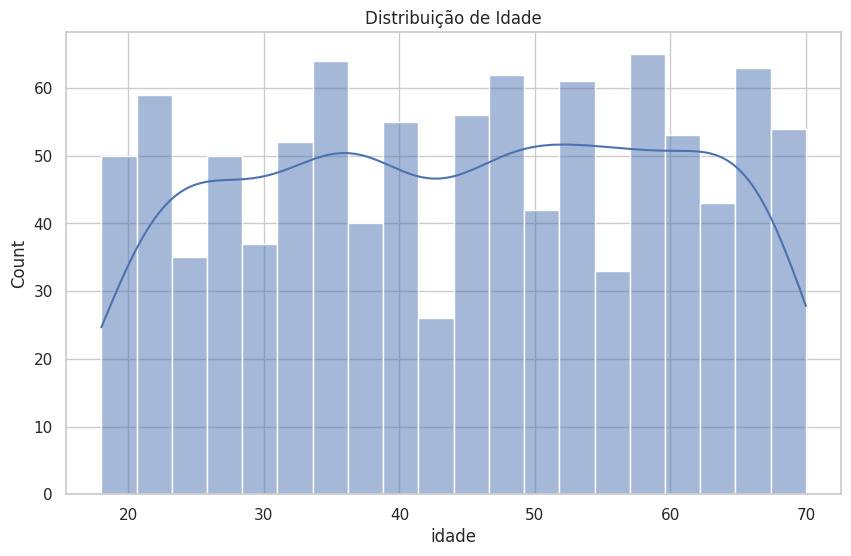

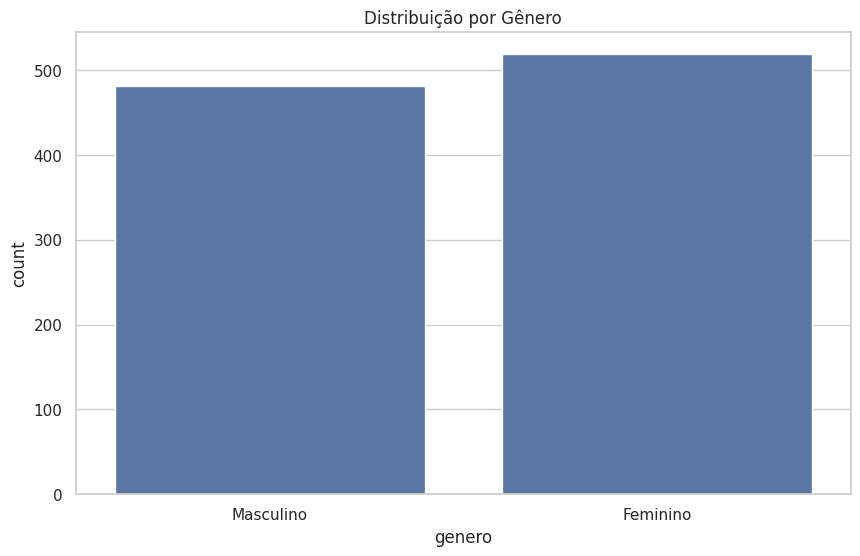

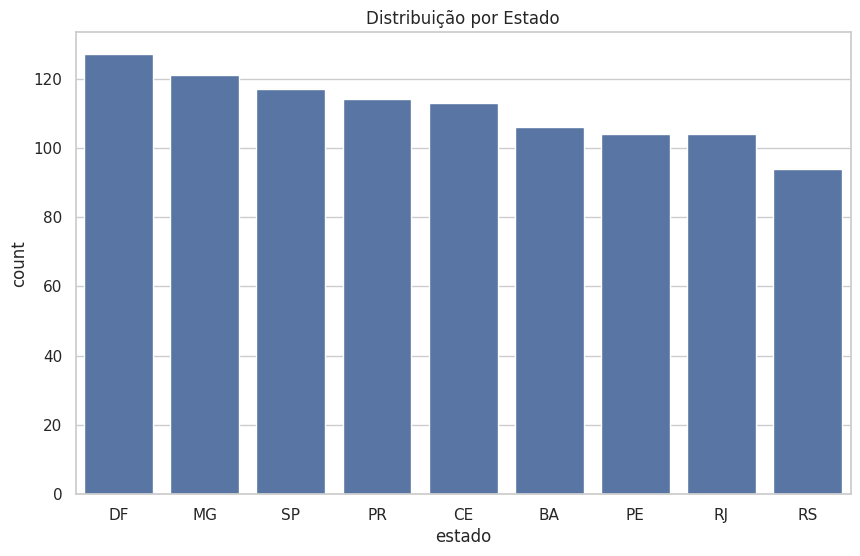

In [3]:
# Distribuição de variáveis demográficas

# Idade
sns.histplot(df['idade'], bins=20, kde=True)
plt.title('Distribuição de Idade')
plt.show()

# Gênero
sns.countplot(x='genero', data=df)
plt.title('Distribuição por Gênero')
plt.show()

# Estado
sns.countplot(x='estado', data=df, order=df['estado'].value_counts().index)
plt.title('Distribuição por Estado')
plt.show()

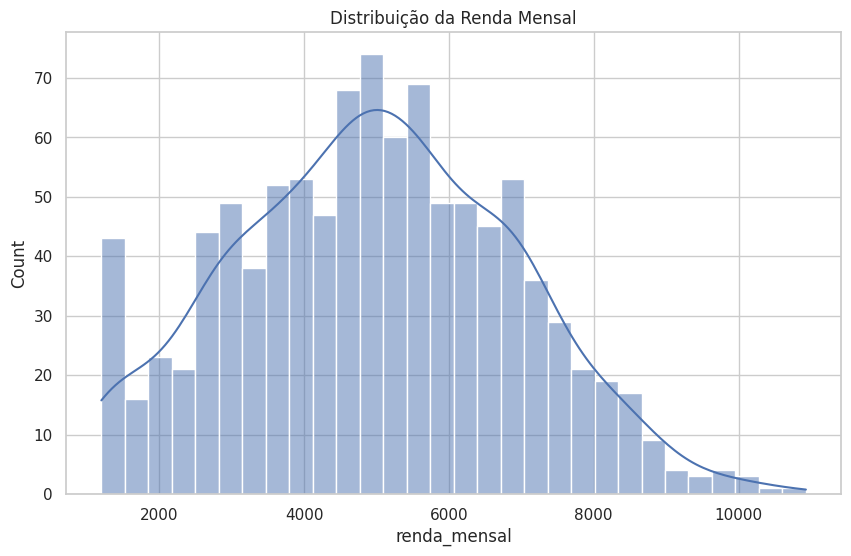

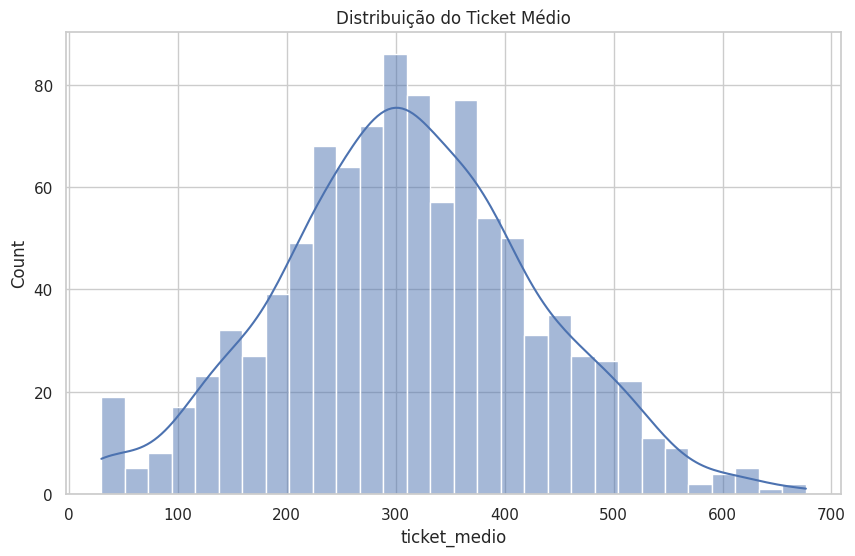

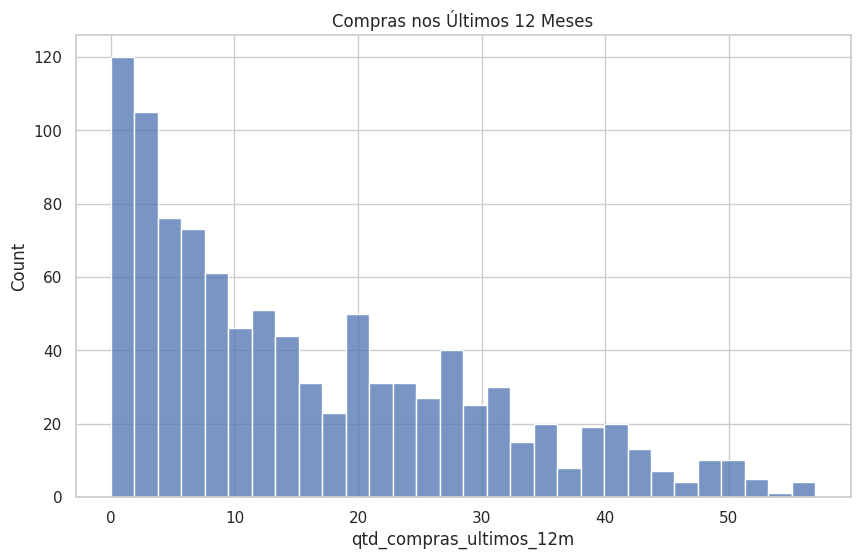

In [4]:
# Renda e comportamento de compra

# Renda mensal
sns.histplot(df['renda_mensal'], bins=30, kde=True)
plt.title('Distribuição da Renda Mensal')
plt.show()

# Ticket médio
sns.histplot(df['ticket_medio'], bins=30, kde=True)
plt.title('Distribuição do Ticket Médio')
plt.show()

# Quantidade de compras
sns.histplot(df['qtd_compras_ultimos_12m'], bins=30)
plt.title('Compras nos Últimos 12 Meses')
plt.show()

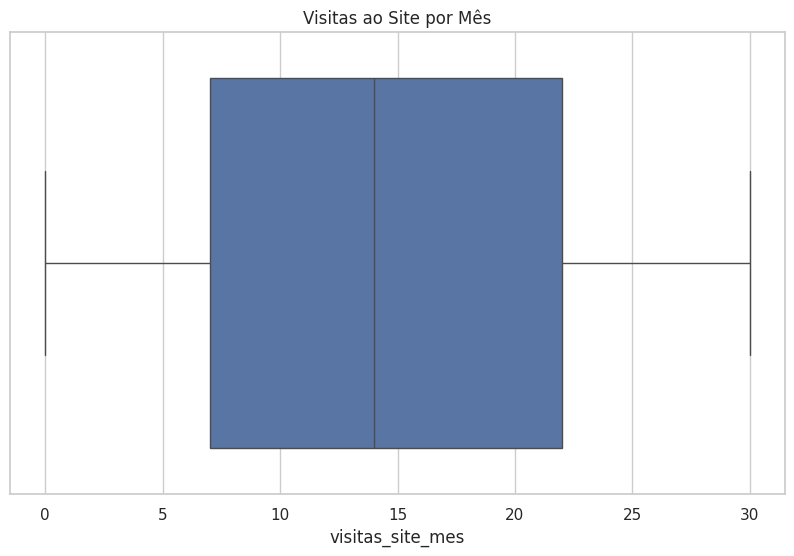

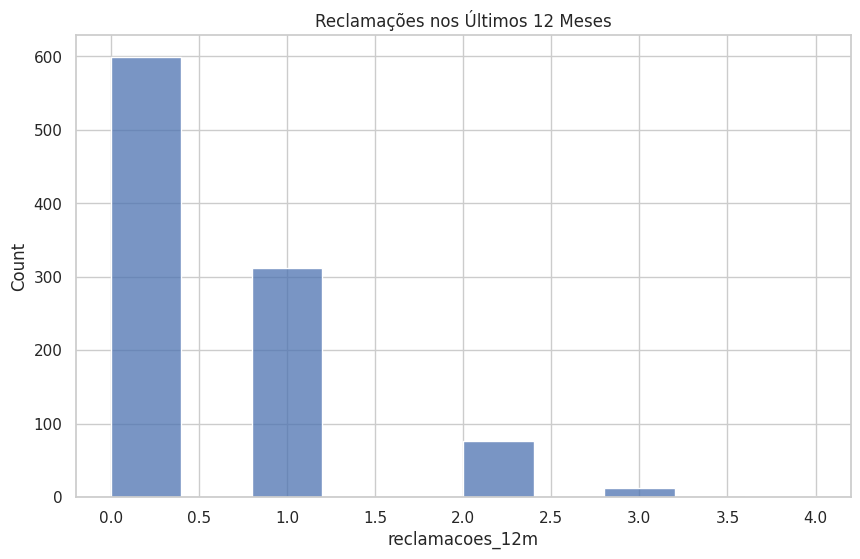

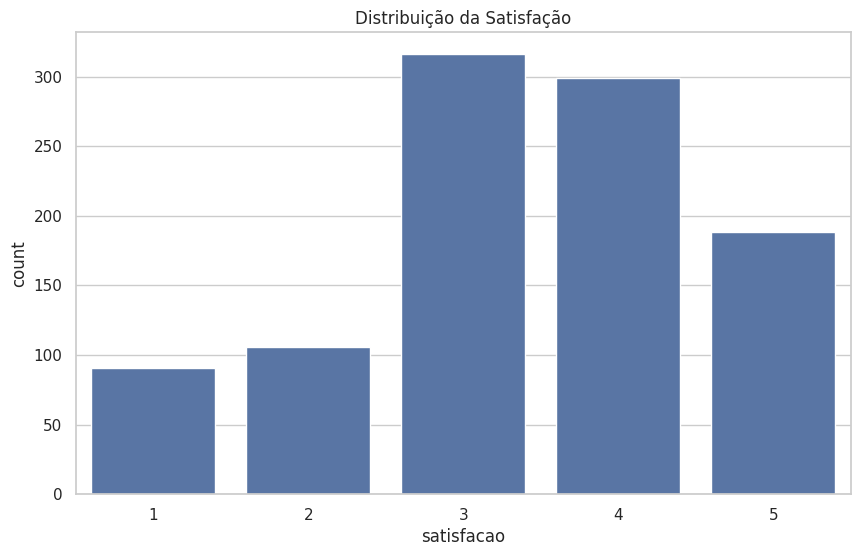

In [5]:
# Engajamento e satisfação

# Visitas ao site
sns.boxplot(x='visitas_site_mes', data=df)
plt.title('Visitas ao Site por Mês')
plt.show()

# Reclamações
sns.histplot(df['reclamacoes_12m'], bins=10)
plt.title('Reclamações nos Últimos 12 Meses')
plt.show()

# Satisfação
sns.countplot(x='satisfacao', data=df)
plt.title('Distribuição da Satisfação')
plt.show()

Taxa de churn: 17.30%


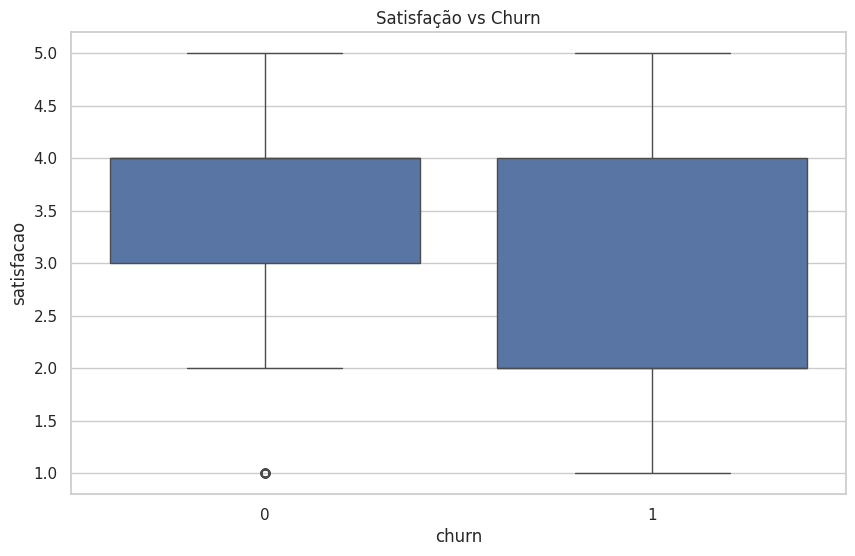

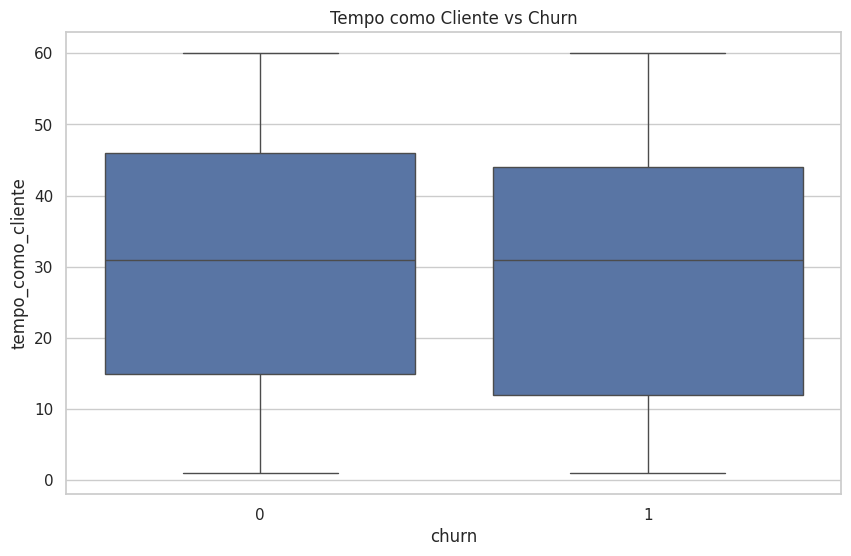

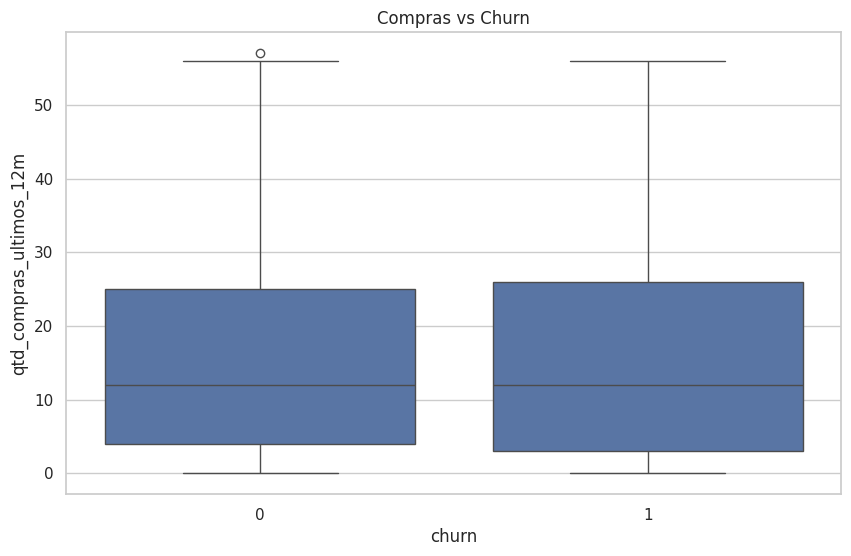

In [6]:
# Análise do churn

# Taxa de churn
churn_rate = df['churn'].mean()
print(f"Taxa de churn: {churn_rate:.2%}")

# Satisfação vs Churn
sns.boxplot(x='churn', y='satisfacao', data=df)
plt.title('Satisfação vs Churn')
plt.show()

# Tempo como cliente vs Churn
sns.boxplot(x='churn', y='tempo_como_cliente', data=df)
plt.title('Tempo como Cliente vs Churn')
plt.show()

# Compras vs Churn
sns.boxplot(x='churn', y='qtd_compras_ultimos_12m', data=df)
plt.title('Compras vs Churn')
plt.show()


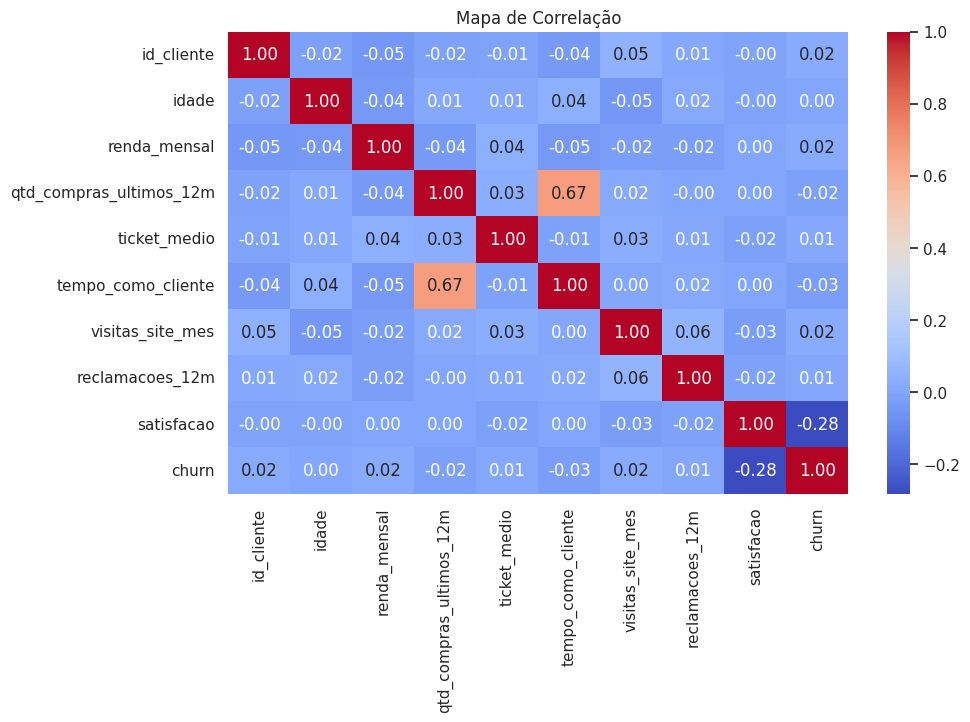

In [7]:
# Mapa de correlação

# Apenas variáveis numéricas
numericas = df.select_dtypes(include=['int64', 'float64'])
corr = numericas.corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação')
plt.show()
